## 설문조사 데이터 전처리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
plt.rc('font', family='Malgun Gothic')

# 엑셀 파일 읽기
df_common = pd.read_excel('dataset/전국민 산림문화 인식 태도 향유실태 조사_일반국민_230530.xlsx', sheet_name="DATA")
df_expo = pd.read_excel('dataset/전국민 산림문화 인식 및 태도 향유실태 조사_산림엑스포_230922.xlsx', sheet_name="DATA")

### 응답자 특성 설문
| `문항` | `보기` |
|:---------:|:---------:|
| <b>`성별`<b> | ①남성    ②여성 |
| <b>`연령`<b>   | ①10대(15세이상)    ②20대   ③30대   ④40대   ⑤50대   ⑥60대이상, 추가설문 : 출생년도(___)년 |
| <b>`학력`<b>   | ①초등학교 졸업(무학 포함)    ②중학교 재학   ③중학교 졸업   ④고등학교 재학   ⑤고등학교 졸업<br>   ⑥대학교 재학    ⑦대학교 졸업    ⑧대학원 재학(석사 또는 박사) ⑨ 대학원 졸업(석사또는 박사) |
| <b>`거주지역`<b>   | ①서울    ②부산   ③대구   ④인천   ⑤광주   ⑥대전    ⑦울산    ⑧세종   ⑨경기<br>   ⑩강원   ⑪충북   ⑫충남   ⑬전북   ⑭전남   ⑮경북   ⑯경남   ⑰제주 |
| <b>`직업`<b>   | ①산림임업종사자    ②사무종사자   ③서비스종사자   ④판매종사자   ⑤기술기능종사자   ⑥단순노무종사자    ⑦전문가(교수 포함)<br>    ⑧경영직종사자   ⑨자영업자(개인사업자)   ⑩공무원(교사포함)   ⑪학생(대학원생포함)   ⑫전업주부   ⑬기타(___) |

In [3]:
Resp_Character = {
    '성별': {1: '남성', 2: '여성'},
    '연령': {1: '10대(15세이상)', 2: '20대', 3: '30대', 4: '40대', 5: '50대', 6: '60대이상'},
    '학력': {1: '초등학교 졸업(무학 포함)', 2: '중학교 재학', 3: '중학교 졸업', 4: '고등학교 재학', 5: '고등학교 졸업', 6: '대학교 재학', 7: '대학교 졸업', 8: '대학원 재학(석사 또는 박사)', 9: '대학원 졸업(석사또는 박사)'},
    '거주지역': {1: '서울', 2: '부산', 3: '대구', 4: '인천', 5: '광주', 6: '대전', 7: '울산', 8: '세종', 9: '경기', 10: '강원', 11: '충북', 12: '충남', 13: '전북', 14: '전남', 15: '경북', 16: '경남', 17: '제주'},
    '직업': {1: '산림임업종사자', 2: '사무종사자', 3: '서비스종사자', 4: '판매종사자', 5: '기술기능종사자', 6: '단순노무종사자', 7: '전문가(교수 포함)', 8: '경영직종사자', 9: '자영업자(개인사업자)', 10: '공무원(교사포함)', 11: '학생(대학원생포함)', 12: '전업주부', 13: '기타'}}

In [4]:
pd.read_excel('dataset/전국민 산림문화 인식 및 태도 향유실태 조사_산림엑스포_230922.xlsx', sheet_name="변수가이드")['문항'].tolist()[55:65]

['휴식 및 건강 증진',
 '자기 계발',
 '산림에 대한 소양 증진(지식, 정보 등 습득)',
 '즐겁고 재미난 체험',
 '자연(산림) 감수성 함양',
 '가족과의 시간',
 '대인 관계 형성',
 '창작활동에 대한 기대',
 '지역의 독특한 자연 또는 문화 체험',
 '기타']

In [5]:
df_expo

,SQ1,SQ2_1,SQ2_2,SQ3,SQ4,SQ5,SQ5_13_ETC,Q1_1,Q1_2,Q2,...,Q5_20,Q5_20_ETC,Q6_1,Q6_2,Q6_3,Q6_4,Q7_1,Q7_2,Q7_10_ETC,Q8
0,1,5,1965.0,7,10,9,NaN,9,3,2,...,NaN,NaN,5,3,4,5,9,3,NaN,2
1,2,1,NaN,2,10,11,NaN,9,8,6,...,NaN,NaN,4,4,5,5,9,8,NaN,3
2,1,3,NaN,7,10,10,NaN,6,1,2,...,NaN,NaN,4,4,4,4,1,6,NaN,2
3,2,1,NaN,2,10,11,NaN,9,5,6,...,NaN,NaN,4,4,3,5,1,5,NaN,2
4,2,1,NaN,2,10,11,NaN,4,10(체험학습),6,...,NaN,NaN,4,4,4,5,1,8,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,2,NaN,6,9,11,NaN,2,9,6,...,NaN,NaN,5,5,5,5,2,9,NaN,3
101,1,2,NaN,6,10,11,NaN,4,5,6,...,NaN,NaN,4,4,5,4,4,5,NaN,3
102,1,2,NaN,6,10,11,NaN,1,2,6,...,NaN,NaN,3,5,2,1,6,5,NaN,3
103,1,2,NaN,6,9,11,NaN,2,3,6,...,NaN,NaN,5,5,5,5,2,9,NaN,6


In [ ]:
a = ['휴식 및 건강 증진',
        '자기 계발',
        '산림에 대한 소양 증진(지식, 정보 등 습득)',
        '즐겁고 재미난 체험',
        '자연(산림) 감수성 함양',
        '가족과의 시간',
        '대인 관계 형성',
        '창작활동에 대한 기대',
        '지역의 독특한 자연 또는 문화 체험',
        '기타']
Q1_1 = {}
for i,v in enumerate(a):
        Q1_1[i+1] = v
Q1_1

In [46]:
frequency_1['1순위']

0     21
1     20
2     17
3     13
4      7
5      7
6      6
7      5
8      4
9      3
10     1
11     1
Name: 1순위, dtype: int64

In [60]:
# 매핑 딕셔너리 정의
Q1_map = {'1': '휴식 및 건강증진',
        '2': '자기계발',
        '3': '산림에 대한 소양증진(지식,정보등 습득)',
        '4': '즐겁고 재미난 체험',
        '5': '자연(산림) 감수성함양',
        '6': '가족과의 시간',
        '7': '대인관계형성',
        '8': '창작활동에 대한 기대',
        '9': '지역의 독특한 자연 또는 문화체험',
        '10': '기타'}

# 데이터프레임에서 'Q1_1' 열과 'Q1_2' 열의 빈도분석을 수행
frequency_1 = df_expo['Q1_1'].value_counts().reset_index()
frequency_1.columns = ['값', '1순위']

frequency_2 = df_expo['Q1_2'].value_counts().reset_index()
frequency_2.columns = ['값', '2순위']

# '값' 열의 값을 딕셔너리를 사용하여 일괄적으로 변경하는 함수 정의
def map_val(series):
        lst = []
        for value in series:
                if str(value).isdigit():
                        lst.append(Q1_map[str(value)])
                else:
                        lst.append(value.replace('10', '기타'))
        return lst
        
frequency_1['값'] = map_val(frequency_1['값'])
frequency_2['값'] = map_val(frequency_2['값'])

In [61]:
frequency_1

,값,1순위
0,휴식 및 건강증진,21
1,"산림에 대한 소양증진(지식,정보등 습득)",20
2,지역의 독특한 자연 또는 문화체험,17
3,즐겁고 재미난 체험,13
4,자기계발,7
5,기타(업무),7
6,대인관계형성,6
7,기타(학과행사),5
8,기타(체험학습),4
9,자연(산림) 감수성함양,3


In [62]:
frequency_2

,값,2순위
0,즐겁고 재미난 체험,24
1,지역의 독특한 자연 또는 문화체험,16
2,휴식 및 건강증진,14
3,자연(산림) 감수성함양,14
4,"산림에 대한 소양증진(지식,정보등 습득)",13
5,자기계발,10
6,대인관계형성,8
7,창작활동에 대한 기대,3
8,기타(체험학습),1
9,가족과의 시간,1


## 강원세계산림 엑스포 참여동기 빈도분석

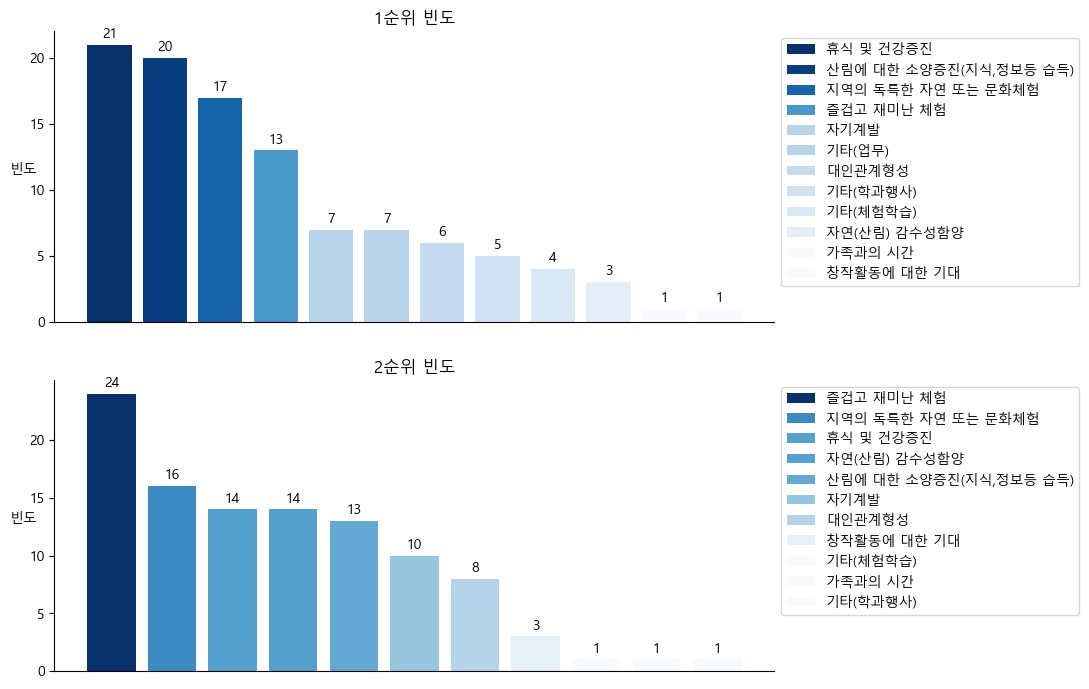

In [77]:
import matplotlib.pyplot as plt

# 그래프 크기 및 서브플롯 생성
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# 색상 맵 설정
cmap = plt.colormaps.get_cmap('Blues')
normalize1 = mpl.colors.Normalize(vmin=min(frequency_1['1순위']), vmax=max(frequency_1['1순위']))
normalize2 = mpl.colors.Normalize(vmin=min(frequency_2['2순위']), vmax=max(frequency_2['2순위']))

# 1순위 그래프 그리기

for i, (value, count) in enumerate(zip(frequency_1['값'], frequency_1['1순위'])):
    axs[0].bar(value, count, color=cmap(normalize1(count)), label=value)
    axs[0].annotate('{}'.format(int(count)),
                    xy=(i, count),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
axs[0].set_title("1순위 빈도")
axs[0].set_xlabel('값')
axs[0].set_ylabel('빈도', rotation=0)
axs[0].xaxis.set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].legend()

# 2순위 그래프 그리기
for i, (value, count) in enumerate(zip(frequency_2['값'], frequency_2['2순위'])):
    axs[1].bar(value, count, color=cmap(normalize2(count)), label=value)
    axs[1].annotate('{}'.format(int(count)),
                    xy=(i, count),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
axs[1].set_title("2순위 빈도")
axs[1].set_xlabel('값')
axs[1].set_ylabel('빈도', rotation=0)
axs[1].axes.xaxis.set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].xaxis.set_tick_params(rotation=0)
axs[1].legend()

# y 축 눈금을 5의 배수 단위로 설정
axs[0].set_yticks(range(0, max(frequency_1['1순위']) + 1, 5))
axs[1].set_yticks(range(0, max(frequency_2['2순위']) + 1, 5))
# 레전드 설정
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.subplots_adjust(left=0.3, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

plt.show()

In [132]:
import plotly.express as px

# 빈도를 비율로 변환
frequency_1['비율'] = frequency_1['1순위'] / frequency_1['1순위'].sum()

# 파이 차트 시각화 (크기 조절)
fig = px.pie(frequency_1, values='비율', names='값', title="<b>빈도 비율 분석</b>", hole=0.2)

fig.update_layout(
        title={
        'text': '1순위 빈도 비율 분석',
        'font': {'size': 24}  # 제목의 폰트 크기 설정
    },
    font=dict(size=13),
    height=750,  # 그림의 높이 설정
    width=1200,    # 그림의 너비 설정
    legend=dict(x=1, y=1.3)  # 범례 위치 조정 (x, y 조절 가능)
)
# 차트 내에 비율 숫자 직접 표시
pull_lst = [0.01] * 4 + [0.05] * 8
fig.update_traces(textinfo='percent+label', pull=pull_lst, insidetextorientation='horizontal')  # 비율 숫자를 라벨과 함께 표시

fig.show()


In [134]:
import plotly.express as px

# 빈도를 비율로 변환
frequency_2['비율'] = frequency_2['2순위'] / frequency_2['2순위'].sum()

# 파이 차트 시각화 (크기 조절)
fig = px.pie(frequency_2, values='비율', names='값', title="<b>빈도 비율 분석</b>", hole=0.2)
fig.update_layout(
        title={
        'text': '2순위 빈도 비율 분석',
        'font': {'size': 24}  # 제목의 폰트 크기 설정
    },
    font=dict(size=13),
    height=700,  # 그림의 높이 설정
    width=1200,    # 그림의 너비 설정
    legend=dict(x=1, y=1.3)  # 범례 위치 조정 (x, y 조절 가능)
)
# 차트 내에 비율 숫자 직접 표시
pull_lst = [0.05] * 4 + [0.1] * 8
fig.update_traces(textinfo='percent+label', pull=pull_lst, insidetextorientation='horizontal')  # 비율 숫자를 라벨과 함께 표시

fig.show()